导入库

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re
import jieba
import wordcloud
import emoji


In [20]:
# def clean_text(text: str, stopwords: list) -> str:
#     """
#     清洗文本，去除停用词、空行、多余空格和 URL。
    
#     :param text: 需要清洗的文本
#     :param stopwords: 停用词列表
#     :return: 清洗后的文本
#     """
#     # 分词
#     seg_list = jieba.cut(text)
    
#     text = ' '.join(seg_list)
#     # 去除URL
#     text = re.sub(r'http[s]?://\S+', '', text)
    
#     # 去除多余空格
#     text = re.sub(r'\s+', ' ', text).strip()
    
#     # 按行分割，去除空行
#     lines = [line.strip() for line in text.split('\n') if line.strip()]
    
#     # 去除停用词
#     clean_lines = []
#     for line in lines:
#         words = line.split()
#         filtered_words = [word for word in words if word not in stopwords]
#         clean_lines.append(' '.join(filtered_words))
    
#     return '\n'.join(clean_lines)
def clean_text(text: str, stopwords: list) -> str:
    """
    清洗文本，去除停用词、空行、多余空格、URL，以及表情符号和特殊符号。

    :param text: 需要清洗的文本
    :param stopwords: 停用词列表
    :return: 清洗后的文本
    """
    # 分词
    seg_list = jieba.cut(text)
    text = ' '.join(seg_list)

    # 去除 URL
    text = re.sub(r'http[s]?://\S+', '', text)

    # 去除多余空格
    text = re.sub(r'\s+', ' ', text).strip()

    # 去除表情符号
    text = emoji.replace_emoji(text, replace='')

    # 去除特殊符号）
    text = re.sub(r'[^\w\s\u4e00-\u9fa5]', '', text)

    # 按行分割，去除空行
    lines = [line.strip() for line in text.split('\n') if line.strip()]

    # 去除停用词
    clean_lines = []
    for line in lines:
        words = line.split()
        filtered_words = [word for word in words if word not in stopwords]
        clean_lines.append(' '.join(filtered_words))

    return '\n'.join(clean_lines)


导入数据

In [21]:
data = pd.read_csv("douban_reviews.csv", encoding="utf-8")
data["title"] = data["title"].astype(str)
data["review"] = data["review"].astype(str)
data["rating"] = data["rating"].replace("默认评分",0).astype(float)
data["upvote"] = data["upvote"].replace("默认赞成",0).astype(int)
data["downvote"] = data["downvote"].replace("默认反对",0).astype(int)
data["rating"] = data["rating"]/10

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     2811 non-null   object 
 1   rating    2811 non-null   float64
 2   upvote    2811 non-null   int64  
 3   downvote  2811 non-null   int64  
 4   review    2811 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 109.9+ KB


In [22]:
data.describe()

,rating,upvote,downvote
count,2811.000000,2811.000000,2811.000000
mean,3.501957,9.788332,2.883671
std,1.695371,113.395803,46.641302
min,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000
75%,5.000000,2.000000,0.000000
max,5.000000,3263.000000,1821.000000


数据清洗

In [23]:
stopwords = [line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8').readlines()]
stopwords[:10]

['打开天窗说亮话',
 '到目前为止',
 '赶早不赶晚',
 '常言说得好',
 '何乐而不为',
 '毫无保留地',
 '由此可见',
 '这就是说',
 '这么点儿',
 '综上所述']

In [24]:
data['seg_review'] = data['review'].apply(lambda x: clean_text(x, stopwords))
data.head()

,title,rating,upvote,downvote,review,seg_review
0,把仙翁塑造成世俗意义上的恶人，这个电影立意就落入俗套了,2.0,3123,1161,欢迎讨论，骂人的都反弹，看到的会删。\r\n\r\n\r\n电影里十二金仙说不能师出无名去剿...,讨论 骂人 反弹 删 电影 里 十二 金仙 说 师出无名 剿灭 龙族 太乙 真人 仙翁 说 ...
1,哪吒反叛的力量：从弑父到弑神,5.0,1885,226,当银幕上哪吒在天元鼎内完成涅槃浴火重生时，相信所有人都会赞同，这绝不是一部普通的续作。时隔六...,银幕 哪吒 天元 鼎内 涅槃 浴火重生 时 所有人 赞同 一部 续作 时隔 六年 导演 饺子...
2,看过一天后，从三星降到两星，喜欢这部电影的这么多，不差我陈塘关百姓一个,2.0,3263,1821,这根本就是一部不该存在的续集，不过魔童降世实在太太太成功了，能怎么办呢。\r\n结果就是，哪...,根本就是 一部 不该 续集 魔童 降世 实在 太太 太 成功 哪吒 第二部 主线 故事 没 ...
3,唯余叹息——哪吒2的成功是快餐流量的狂欢，也是对电影艺术的侮辱,2.0,2362,829,哪吒2开分8.5，大感震惊，似乎与我观影感受有所出入，特来交流一番。（加更：墙裂恳请认同的点...,哪吒 开分 85 大感 震惊 观影 感受 出入 特 交流 加 更 墙裂 恳请 认同 点赞 转...
4,合格的商业片，但仍想提出质疑,3.0,1093,263,作为贺岁档电影，哪吒无疑是一部合格的商业片。故事节奏快，至少看着不会无聊，围绕亲情...,贺岁 档 电影 哪吒 无疑 一部 合格 商业片 故事 节奏快 至少 看着 无聊 围绕 亲情 ...


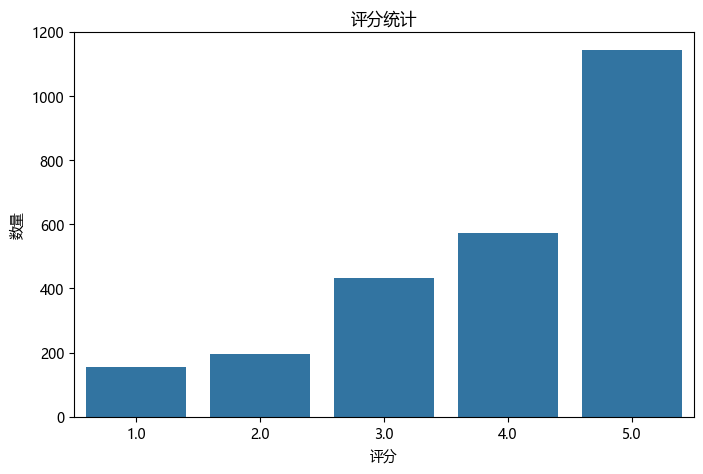

In [25]:
# rating分布特征 仅保留 rating > 0 的数据
ratings = data["rating"].dropna()
ratings = ratings[ratings > 0]

plt.figure(figsize=(8, 5))
sns.countplot(x=ratings, order=sorted(ratings.unique()))
plt.xlabel("评分")
plt.ylabel("数量")
plt.title("评分统计")
plt.show()


In [45]:
# 词云
def get_word_cloud(text):
    wc_stopwords = ["中","说","没","更","时"]
    wc = wordcloud.WordCloud(
        stopwords=wc_stopwords,
        font_path="msyh.ttc",
        width=800,
        height=400,
        background_color="white",
        mask=plt.imread("nezha.jpg"),
        max_words=100,
        random_state=42,
    )
    wc.generate(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

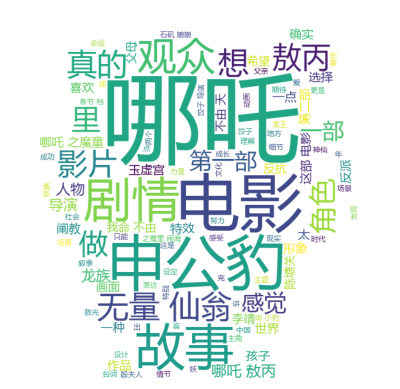

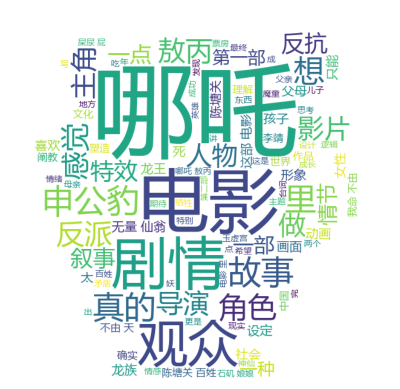

In [46]:
# 高分词云
good_reviews=data[data["rating"]>3]["seg_review"].str.cat(sep=" ")
get_word_cloud(good_reviews)
# 低分词云
bad_reviews=data[data["rating"]<=3]["seg_review"].str.cat(sep=" ")
get_word_cloud(bad_reviews)

In [47]:
guoman = data[(data["title"].str.contains("国漫")) & (data["review"].str.contains("国漫"))]
guoman.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 37 to 2792
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       37 non-null     object 
 1   rating      37 non-null     float64
 2   upvote      37 non-null     int64  
 3   downvote    37 non-null     int64  
 4   review      37 non-null     object 
 5   seg_review  37 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ KB


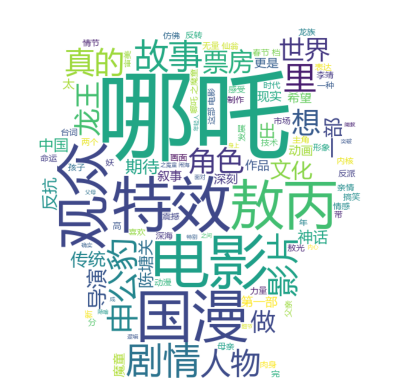

In [48]:
guoman_reviews = guoman["seg_review"].str.cat(sep=" ")
get_word_cloud(guoman_reviews)